## Univariate Selection

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [4]:
x_train = pd.read_csv("../data/mobile_price_classification/train.csv")

In [6]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
x_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
x = x_train.iloc[:,:-1]
y= x_train.iloc[:,-1]

#### SelectKBest top 10 features

In [15]:
best_features = SelectKBest(score_func=chi2,k=10)

In [19]:
fit = best_features.fit(x,y)

In [22]:
fit.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [58]:
dfscores = pd.DataFrame(fit.scores_)
dfcoloumns =  pd.DataFrame(x.columns)

In [59]:
featureScore = pd.concat((dfcoloumns,dfscores),axis=1)

In [60]:
featureScore.columns = ["Features","Score"]

In [38]:
featureScore.sort_values(by='Score',ascending=False)

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


## Feature Importance

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
model = RandomForestClassifier()
model.fit(x,y)

RandomForestClassifier()

In [46]:
model.feature_importances_

array([0.07605959, 0.00585182, 0.02662486, 0.00675629, 0.02436948,
       0.00652127, 0.03637019, 0.02340173, 0.03830998, 0.02231345,
       0.02908825, 0.05753775, 0.05410063, 0.48832303, 0.02746185,
       0.02809256, 0.02980202, 0.00562451, 0.00707115, 0.00631958])

In [61]:
featureImportance = pd.DataFrame(model.feature_importances_,index=x.columns,columns=["Importance"])

In [66]:
 featureImportance= featureImportance.sort_values(by="Importance",ascending=False)

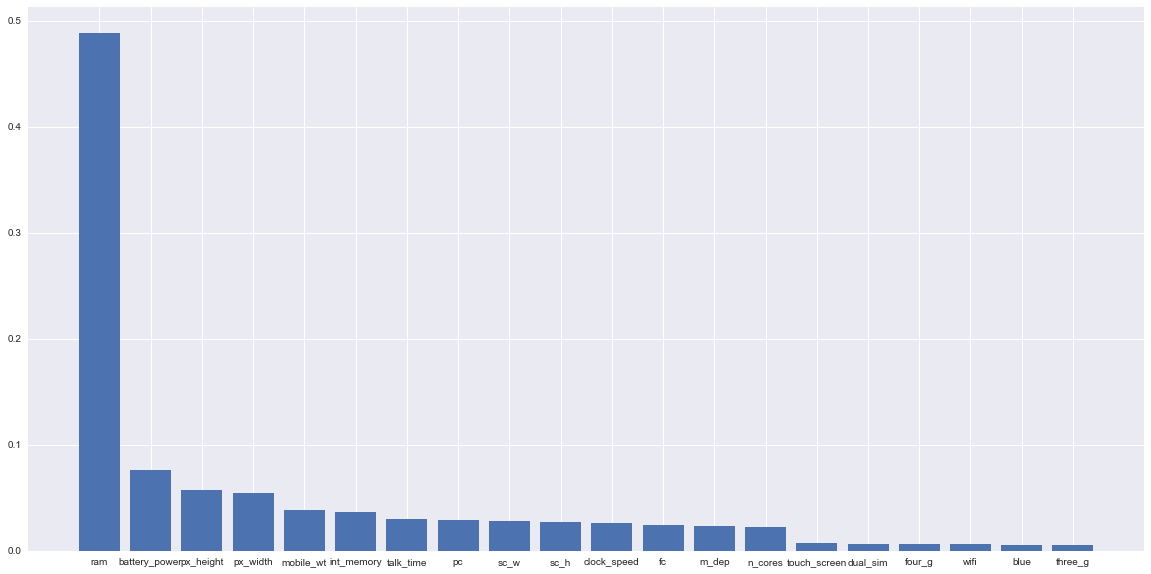

In [67]:
plt.figure(figsize=(20,10))
plt.bar(featureImportance.index,featureImportance.Importance)
plt.show()

## Correlation Matrix

In [70]:
x_corr= x_train.corr()

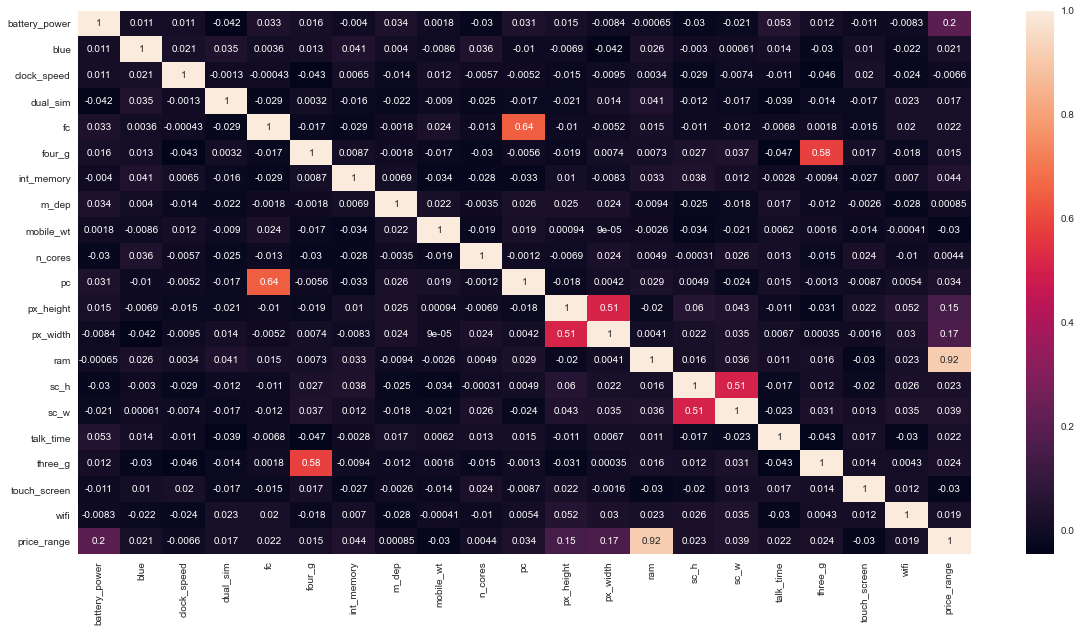

In [72]:
plt.figure(figsize=(20,10))
sns.heatmap(x_corr,annot=True)
plt.show()

### Check the model Performance

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
rfc = RandomForestClassifier()

In [75]:
scores = cross_val_score (rfc,x,y,cv=10)

In [77]:
scores.mean()

0.8815

In [90]:
top_features = featureScore.sort_values(by='Score',ascending=False).head(5).Features.values

In [91]:
scores_top_f = cross_val_score(rfc,x[top_features],y,cv=10)

In [92]:
scores_top_f.mean()

0.9195